# Base de dados

In [ ]:
# Importar lib do pandas
import pandas as pd

# Importar os dados
URL = 'https://raw.githubusercontent.com/profviniciusheltai/AulaIA/refs/heads/main/Projeto04.csv'
dados = pd.read_csv(URL)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


Editar informações

Trocar nomes dos indices

In [ ]:
# Dicionarios para tradução
renomear_indice ={
    "mileage_per_year":"milhas_por_ano",
    "model_year":"ano_modelo",
    "price":"preco",
    "sold":"vendeu"
}

# Aplicando a tradução
dados = dados.rename(columns=renomear_indice)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendeu
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


Trocar valores da coluna "vendeu"

In [ ]:
# Dicionario para traducao
renomear_valor ={
    "yes":1,
    "no":0
}

dados.vendeu = dados.vendeu.map(renomear_valor)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendeu
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


Criar coluna que consta a idade do veículo, não apenas seu ano de fabricação

In [ ]:
# Importar libs para processar daas
from datetime import datetime

# Processamento dessa informação
ano_atual = datetime.today().year
dados['idade_modelo'] = ano_atual - dados.ano_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendeu,idade_modelo
0,0,21801,2000,30941.02,1,25
1,1,7843,1998,40557.96,1,27
2,2,7109,2006,89627.50,0,19
3,3,26823,2015,95276.14,0,10
4,4,7935,2014,117384.68,1,11


Considerando que 1 milha = 1.60934 km, criar a coluna "km_por_ano" com os dados convertidos

In [ ]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60943
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendeu,idade_modelo,km_por_ano
0,0,21801,2000,30941.02,1,25,35087.18343
1,1,7843,1998,40557.96,1,27,12622.75949
2,2,7109,2006,89627.50,0,19,11441.43787
3,3,26823,2015,95276.14,0,10,43169.74089
4,4,7935,2014,117384.68,1,11,12770.82705


Limpando a base com informações irrelevantes

In [ ]:
dados = dados.drop(columns=["Unnamed: 0", "milhas_por_ano", "ano_modelo"], axis=1)
dados.head()

,preco,vendeu,idade_modelo,km_por_ano
0,30941.02,1,25,35087.18343
1,40557.96,1,27,12622.75949
2,89627.50,0,19,11441.43787
3,95276.14,0,10,43169.74089
4,117384.68,1,11,12770.82705


Montagem da base 1

In [ ]:
# Importando a lib
from sklearn.model_selection import train_test_split
import numpy as np

# Definindo o que é x e y
x = dados[["preco", "idade_modelo", "km_por_ano"]]
y = dados["vendeu"]

# Criação da base
SEED = 20
np.random.seed(SEED)
treino1_x, teste1_x, treino1_y, teste1_y = train_test_split(x, y, test_size=0.3, stratify=y)

# Demonstração do resultado
print(f"Treino: {len(treino1_x)}\nTeste: {len(teste1_x)}")

Treino: 7000
Teste: 3000


Montagem da base 2 (Utilizando StandardScaler)

In [ ]:
# Importando a lib
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Definindo o que é x e y
x = dados[["preco", "idade_modelo", "km_por_ano"]]
y = dados["vendeu"]

# Criação da base
SEED = 20
np.random.seed(SEED)
treino2_x, teste2_x, treino2_y, teste2_y = train_test_split(x, y, test_size=0.3, stratify=y)

# Aplicação do Scaler
scaler2 = StandardScaler()
scaler2.fit(treino2_x)
treino2_x = scaler2.transform(treino2_x)
teste2_x = scaler2.transform(teste2_x)

# Demonstração do resultado
print(f"Treino: {len(treino2_x)}\nTeste: {len(teste2_x)}")

Treino: 7000
Teste: 3000


# Treinamento

In [ ]:
# Importação das libs e Modulos necessários
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

Modelo LinearSVC - utilizando base 1

In [ ]:
# Treinamento
modelo1 = LinearSVC()
modelo1.fit(treino1_x, treino1_y)

# Teste
previsoes1 = modelo1.predict(teste1_x)

# Precisao
precisao1 = accuracy_score(teste1_y, previsoes1) * 100

Modelo Dummy Stratified - uilizando base 1

In [ ]:
# Importação das libs
from sklearn.dummy import DummyClassifier

In [ ]:
# Treinamento
modelo2 = DummyClassifier()
modelo2.fit(treino1_x, treino1_y)

# Teste
previsoes2 = modelo2.predict(teste1_x)

# Precisao
precisao2 = accuracy_score(teste1_y, previsoes2) * 100

Modelo SVC - utilizando base 2

In [ ]:
# Treinamento
modelo3 = SVC()
modelo3.fit(treino2_x, treino2_y)

# Teste
previsoes3 = modelo3.predict(teste2_x)

# Precisao
precisao3 = accuracy_score(teste2_y, previsoes3) * 100

# Analise grafica dos resultados

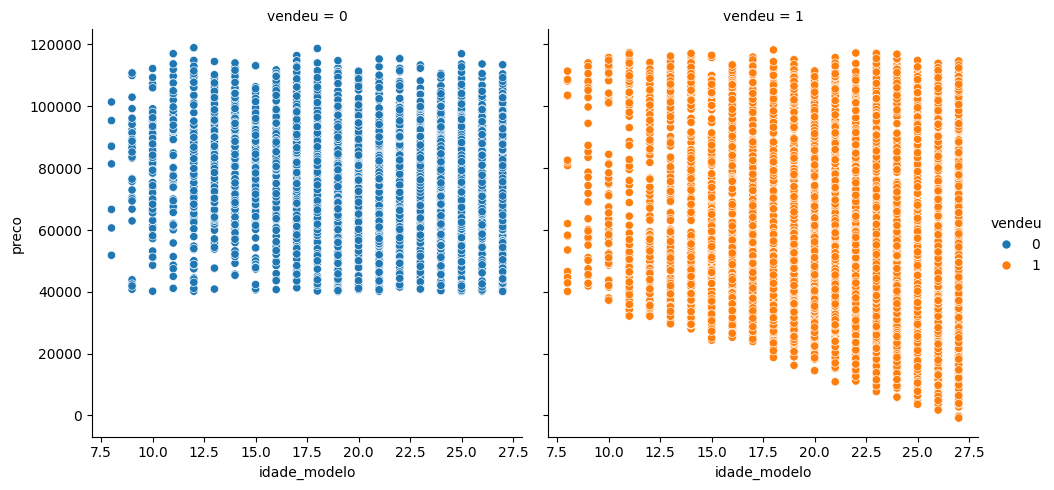

In [ ]:
# Importando as libs necessárias
import seaborn as sns

# Plotando o grafico de dispersão
sns.relplot(x="idade_modelo", y="preco", hue="vendeu", col="vendeu", data=dados)

# Arvore de decisão

In [ ]:
# Instalação do Graphviz na VM
!apt-get -qq install -y graphviz && pip install -q pydot

In [ ]:
# Importando as libs para arvore de decisao
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Treinamento
modelo4 = DecisionTreeClassifier(max_depth=2)
modelo4.fit(treino2_x, treino2_y)

# Testar
previsao4 = modelo4.predict(teste2_x)

# Precisao
precisao4 = accuracy_score(teste2_y, previsao4) * 100

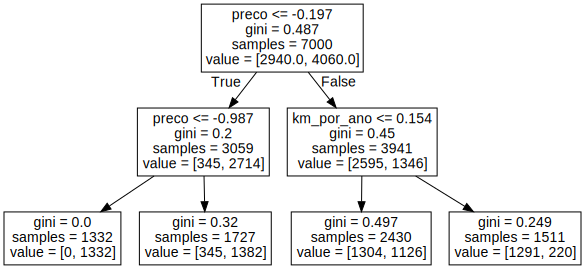

In [ ]:
# Importação das Libs
from sklearn.tree import export_graphviz
import graphviz
features = ['preco', 'idade_modelo', 'km_por_ano']

# Plotando o gráfico
dot_data = export_graphviz(modelo4,
                           out_file=None,
                           feature_names=features,
                           )
grafico = graphviz.Source(dot_data)
grafico

# Precisão dos modelos

In [ ]:
# Precisão
print("Modelos utilizando a base 1:")
print(f"--- Previsão LinearSVC - {precisao1:.2f}%")
print(f"--- Previsão DummyClassifier - {precisao2:.2f}%\n")
print("Modelos utilizando a base 2:")
print(f"--- Previsão SVC - {precisao3:.2f}%")
print(f"--- Previsão DecisionTreeClassifier - {precisao4:.2f}%")

Modelos utilizando a base 1:
--- Previsão LinearSVC - 65.73%
--- Previsão DummyClassifier - 58.00%

Modelos utilizando a base 2:
--- Previsão SVC - 76.33%
--- Previsão DecisionTreeClassifier - 78.03%
